In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import quandl



QUESTION 1_A

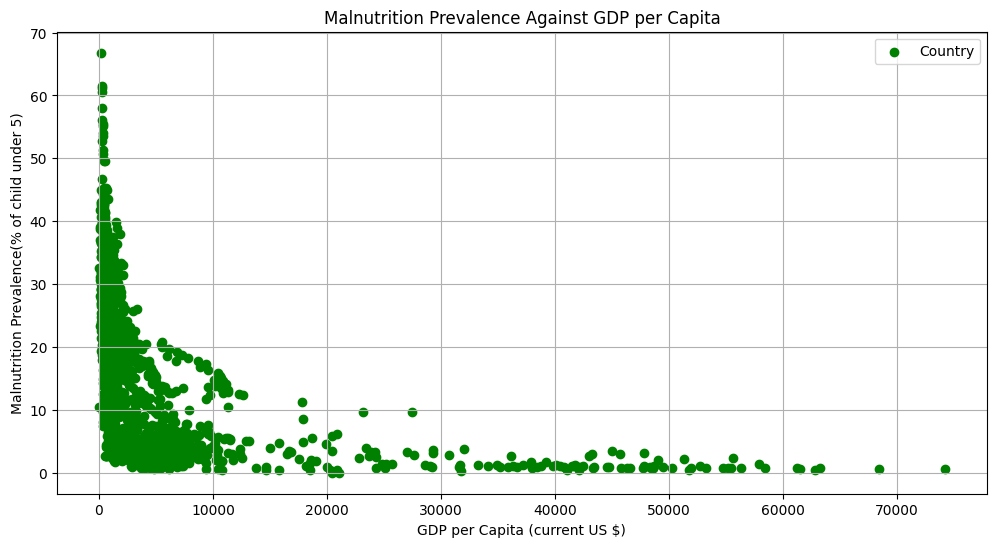

In [9]:
""" Given two dataset GDP per capita and Malnutrition prevalence(child under 5 year) 
    used pandas to access the data and then extract the data between 1960 and 2022.
    make scatter plot of Malnutrition prevalence against GDP per capita
"""
df_1 = pd.read_excel('API_NY.GDP.PCAP.CD_DS2_en_excel_v2_5795829.xlsx', sheet_name = 'Data', skiprows = 3)   # Reading GDP per capita data
df_2 = pd.read_excel('API_SH.STA.MALN.ZS_DS2_en_excel_v2_5730295.xlsx', sheet_name = 'Data', skiprows = 3)   #malnutrition Prevalence
#Extraction  of  years column data value and create an array
GDP = np.array(df_1.loc[:, '1960':'2022']) # Creating GDP per capita array of years data value
Malnutrition = np.array(df_2.loc[:, '1960':'2022']) # Creating Malnutrition prevalance array of data value
#Plotting Malnutrition Prevalence against GDP per Capita
plt.figure(figsize = (12,6)) 
plt.scatter(GDP, Malnutrition, color = 'g', label = 'Country')     # scatter plot
plt.xlabel('GDP per Capita (current US $)')
plt.ylabel('Malnutrition Prevalence(% of child under 5)')
plt.legend()
plt.grid()
plt.title('Malnutrition Prevalence Against GDP per Capita')
plt.show()

QUESTION 1_B

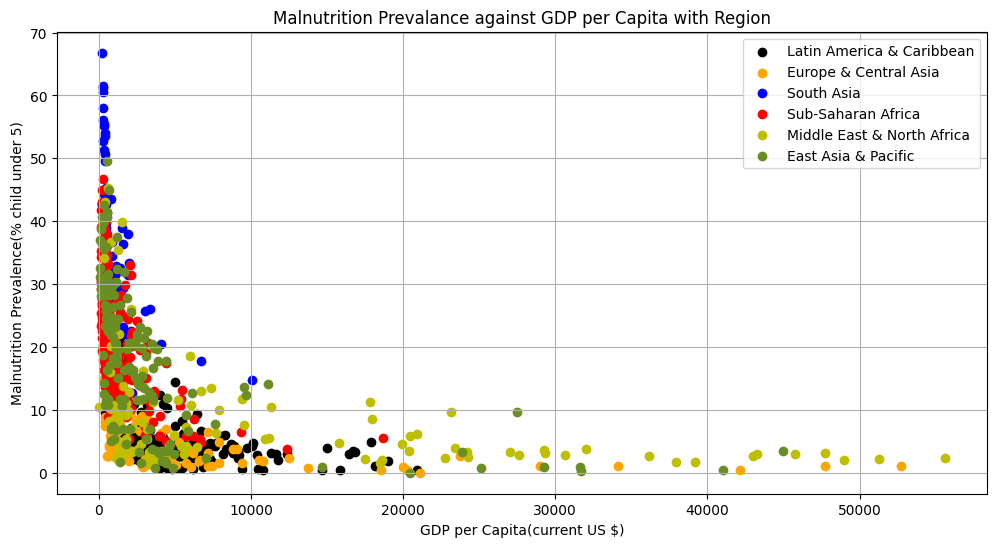

In [13]:
#Reading Meta data countries sheet from dataset
Meta_1 = pd.read_excel('API_NY.GDP.PCAP.CD_DS2_en_excel_v2_5795829.xlsx', sheet_name = 'Metadata - Countries')
Meta_2 = pd.read_excel('API_SH.STA.MALN.ZS_DS2_en_excel_v2_5730295.xlsx', sheet_name = 'Metadata - Countries')
# Synchronising metadata and Data 
merge_1 = pd.merge(df_1, Meta_1, how = 'inner')    # synchronising GDP per capital data And Metadata as Merge_1
merge_1.to_excel('Mergedfile_1.xlsx')              # Generating other datafile store Merged data called Mergedfile_1
merge_2 = pd.merge(df_2, Meta_2, how = 'inner')   # Merging Malnutrition Prevalence Data and Meta data as Merge_2
merge_2.to_excel('Mergedfile_2.xlsx')             # Merged file into separate datafile called Mergedfile_2  

# Excluding the North America from the column of Region
Merge_1 = merge_1[merge_1['Region'] != 'North America']
Merge_1.reset_index(drop = True)
Merge_2 = merge_2[merge_2['Region'] != 'North America']
Merge_2.reset_index(drop = True)
# Grouping Region with color in the same dictionary
Colors= {
    'Latin America & Caribbean' : 'k',
    'Europe & Central Asia':'orange',
    'South Asia' : 'b',
    'Sub-Saharan Africa' : 'r',
    'Middle East & North Africa' : 'y',
    'East Asia & Pacific' : 'olivedrab'
}
# scatter plotting Graph
plt.figure(figsize = (12,6))
for Region, color in Colors.items():
    Gdp_values = Merge_1.loc[Merge_1['Region'] == Region, '1960': '2022']
    Mal_values = Merge_2.loc[Merge_2['Region'] == Region, '1960' : '2022']
    
    plt.scatter(Gdp_values, Mal_values, label = Region, color = color)

plt.xlabel('GDP per Capita(current US $)')
plt.ylabel('Malnutrition Prevalence(% child under 5)')
plt.title("Malnutrition Prevalance against GDP per Capita with Region")
plt.legend()
plt.grid()
plt.show()
    

QUESTION 1_C

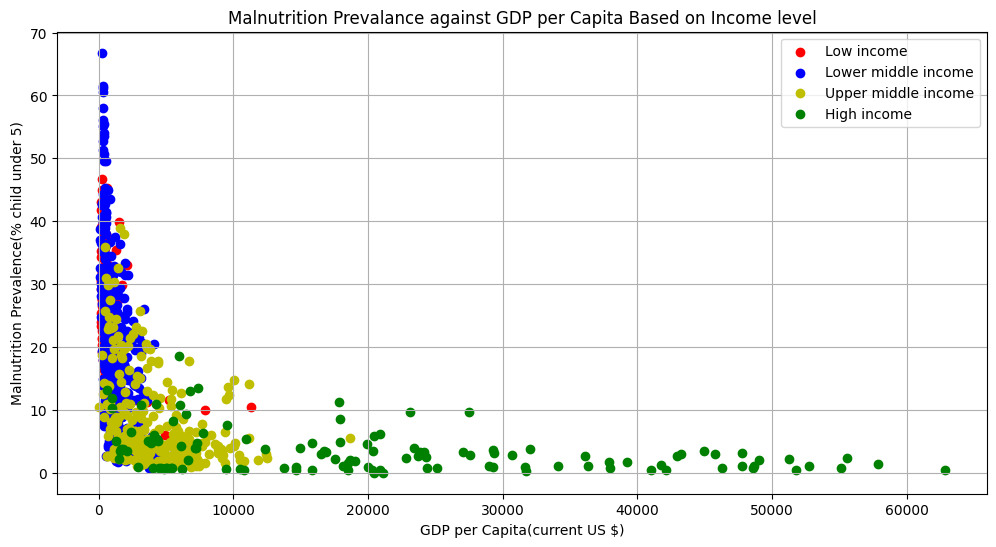

In [14]:
#Calling the merged file from previous subquestion to be used.
merge_1 = pd.merge(df_1, Meta_1, how = 'inner')
merge_2 = pd.merge(df_2, Meta_2, how = 'inner')  
# dictionary that assign colors to the income levels
colors = {
    'Low income': 'r',
    'Lower middle income': 'b',
    'Upper middle income': 'y',
    'High income': 'g'
}
#merge_1['IncomeGroup'] = merge_1['IncomeGroup'].map(colors)
plt.figure(figsize = (12,6))
for Income, color in colors.items():
    Gdp_income = merge_1.loc[merge_1['IncomeGroup'] == Income, '1960': '2022']
    Mal_income = merge_2.loc[merge_2['IncomeGroup'] == Income, '1960' : '2022']
    plt.scatter(Gdp_income, Mal_income, label = Income, color = color)
plt.xlabel('GDP per Capita(current US $)')
plt.ylabel('Malnutrition Prevalence(% child under 5)')
plt.title("Malnutrition Prevalance against GDP per Capita Based on Income level")
plt.legend()
plt.grid()
plt.show()

QUESTION 2

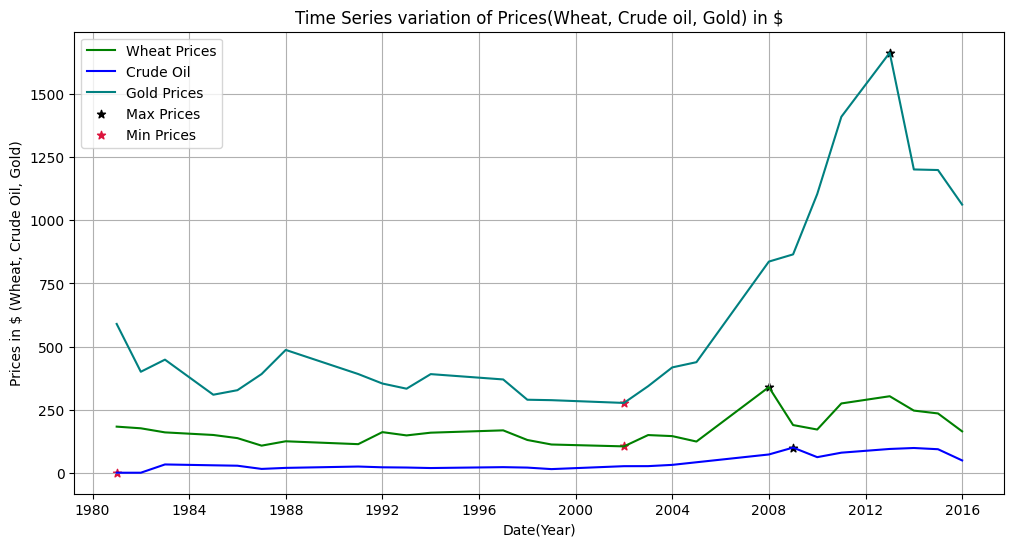

In [18]:
"""Accessing Nasdaq data using Key and quandl code to retrive their dataset
   then plot  their relation to the date after synchronising
"""
quandl.ApiConfig.api_key = 'DkzaLxD779kf7nmfYaHj'
Wheat_Prices = quandl.get('ODA/PWHEAMT_USD')
Crude_Oil = quandl.get('WGEC/WLD_CRUDE_WTI')
Gold_Prices = quandl.get('BUNDESBANK/BBK01_WT5511')
# Merging Three dataframe
Merge = pd.merge(Wheat_Prices, Crude_Oil, on  = 'Date', how  = 'inner') # first join wheat and crude oil prices into one dataframe
Merge_1 = pd.merge(Merge, Gold_Prices, on  = 'Date', how = 'inner') # joining previous dataframe with remaining Gold price that frame
Merge_1 = Merge_1.rename(columns = { 'Value_x' : 'Wheat Prices', 'Value_y' : 'Crude Oil', 'Value' : 'Gold Prices'  })  # renaming the dataframe for clear understanding
Max = Merge_1.idxmax()      # indicate the time when we get maximum price
Min = Merge_1.idxmin()      # Showing Exactly the date when the price is low
#plotting the prices against the time series(years)
plt.figure(figsize = (12,6))
plt.plot(Merge_1.index, Merge_1['Wheat Prices'] , label = 'Wheat Prices', color  = 'green')
plt.plot(Merge_1.index, Merge_1['Crude Oil'], label = 'Crude Oil', color = 'blue')
plt.plot(Merge_1.index, Merge_1['Gold Prices'], label = 'Gold Prices', color = 'teal')
plt.scatter(Max, Merge_1.max(), color = 'k', label = 'Max Prices', marker = '*')
plt.scatter(Min, Merge_1.min(), color = 'crimson', label = 'Min Prices', marker = '*')
plt.xlabel('Date(Year)')
plt.ylabel('Prices in $ (Wheat, Crude Oil, Gold)')
plt.title('Time Series variation of Prices(Wheat, Crude oil, Gold) in $')
plt.grid()
plt.legend()
plt.show()

QUESTION 3

In [7]:
"""Using world bank indicator download required Dataset require to
   compute the summary statistic (mean, median, Standart deviation and quartile) then 
   form table"""
data_1 = pd.read_excel('API_EN.ATM.CO2E.PC_DS2_en_excel_v2_5708461.xlsx', sheet_name = 'Data', skiprows = 3) #loading the 
data_1_2010 = data_1['2010'].dropna()    # Extracting column of 2010 data and dropping missing values
Mean_1 = data_1_2010.mean()              # use Built function mean to find mean of CO2 emission 
Median_1 = data_1_2010.median()          # using buitin median to find midpoint of CO2 emitted in 2010
STD_1 = data_1_2010.std()                # Calculating standard deviation by calling its function 
Percentile5_1 = data_1_2010.quantile(5/100)   # 5 percentile of CO2  2010 data
Percentile25_1 = data_1_2010.quantile(25/100) # 25 pecentile of CO2 in 2010 data
Percentile75_1 = data_1_2010.quantile(75/100) # 75 percentile 
Percentile95_1 = data_1_2010.quantile(95/100)  # 95 Percentile
# Creating dictionary that will dispay table summarize statistic of CO2 Emitted 
CO2_Statistcs = {
    'Name' :['Mean','Median','Standard Deviation','Percentile 5','Percentile 25','Percentile 75','Percentile 95' ],
    'Statistic': [Mean_1,Median_1, STD_1,Percentile5_1,Percentile25_1,Percentile75_1, Percentile95_1]
}
Table_1 = pd.DataFrame(CO2_Statistcs)
print('\nTable Summarize statistics of CO2 Emission for countries in 2010')

Table_1                    # Return the summary


Table Summarize statistics of CO2 Emission for countries in 2010


,Name,Statistic
0,Mean,4.304659
1,Median,2.667140
2,Standard Deviation,5.069186
3,Percentile 5,0.114860
4,Percentile 25,0.756011
5,Percentile 75,5.891798
6,Percentile 95,15.172009


In [9]:
# Retriving  school enrollement primary data   
data_2 = pd.read_excel('API_SE.PRM.NENR_DS2_en_excel_v2_5729813.xlsx', sheet_name = 'Data', skiprows = 3)
data_2_2010 = data_2['2010'].dropna()       # Extracting column of 2010 and drop missing values in the dataframe
# Determining the statistc of school enrollement for data of 2010
Mean_2 = data_2_2010.mean()                # Mean calculating
Median_2 = data_2_2010.median()            # Median
STD_2 = data_2_2010.std()                  # Standard deviation (STD) of student 
Percentile5_2 = data_2_2010.quantile(5/100)
Percentile25_2 = data_2_2010.quantile(25/100)
Percentile75_2 = data_2_2010.quantile(75/100)
Percentile95_2 = data_2_2010.quantile(95/100)
School_statistic = {
    'Name' :['Mean','Median','Standard Deviation','Percentile 5','Percentile 25','Percentile 75','Percentile 95' ],
    'Statistic': [Mean_2,Median_2, STD_2,Percentile5_2,Percentile25_2,Percentile75_2, Percentile95_2]
}
Table_2 = pd.DataFrame(School_statistic)
print('\nTable Summarize statistics of School enrollment primary(% net) for countries in 2010')
Table_2      # Return the summary statistic of School enrollment data


Table Summarize statistics of School enrollment primary(% net) for countries in 2010


,Name,Statistic
0,Mean,90.105088
1,Median,92.956725
2,Standard Deviation,9.527627
3,Percentile 5,66.656820
4,Percentile 25,87.801005
5,Percentile 75,95.934427
6,Percentile 95,98.872787


QUESTION 4_A

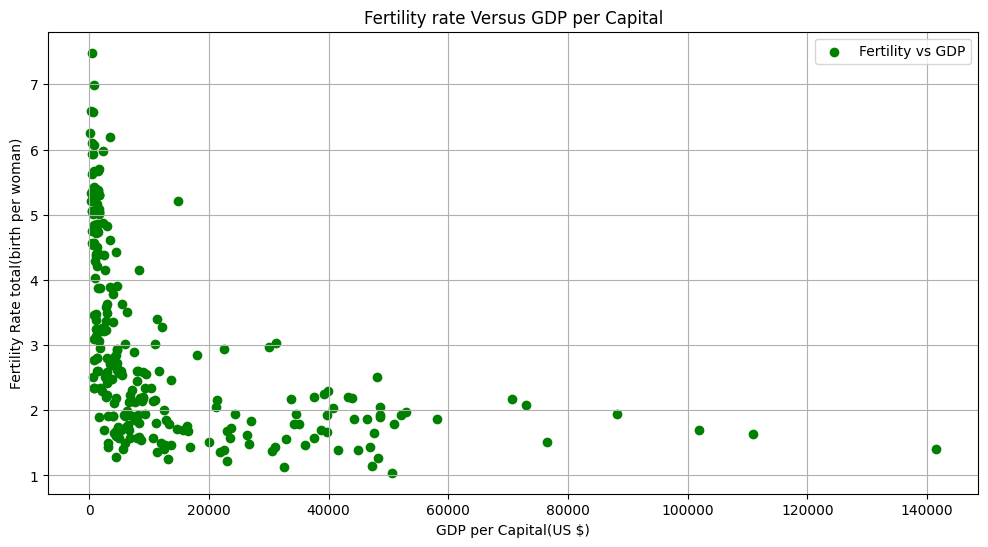

In [19]:
"""Relation between two data set Fertility rate total(births per women) and
   GDP per capita(current US $) using scatter plot"""
#retriving both dataset
Fertility_df = pd.read_excel('API_SP.DYN.TFRT.IN_DS2_en_excel_v2_5839898.xlsx', sheet_name = 'Data', skiprows = 3 )
GDP_df = pd.read_excel('API_NY.GDP.PCAP.CD_DS2_en_excel_v2_5839627.xlsx', sheet_name = 'Data', skiprows = 3 )
Fertility_df_2010= Fertility_df['2010']  # Extracting the in data sheet the column of 2010 for data file of fertility rate
GDP_df_2010 = GDP_df['2010']             # Exctracting the column of 2010 in datafile of GDP per capita
#plotting the Graph of Fertility rate against GDP per capita
plt.figure(figsize = (12,6))
plt.scatter(GDP_df_2010, Fertility_df_2010, color = 'g', label = 'Fertility vs GDP')
plt.xlabel('GDP per Capital(US $)')
plt.ylabel('Fertility Rate total(birth per woman)')
plt.legend()
plt.grid()
plt.title('Fertility rate Versus GDP per Capital')
plt.show()


QUESTION 4_B

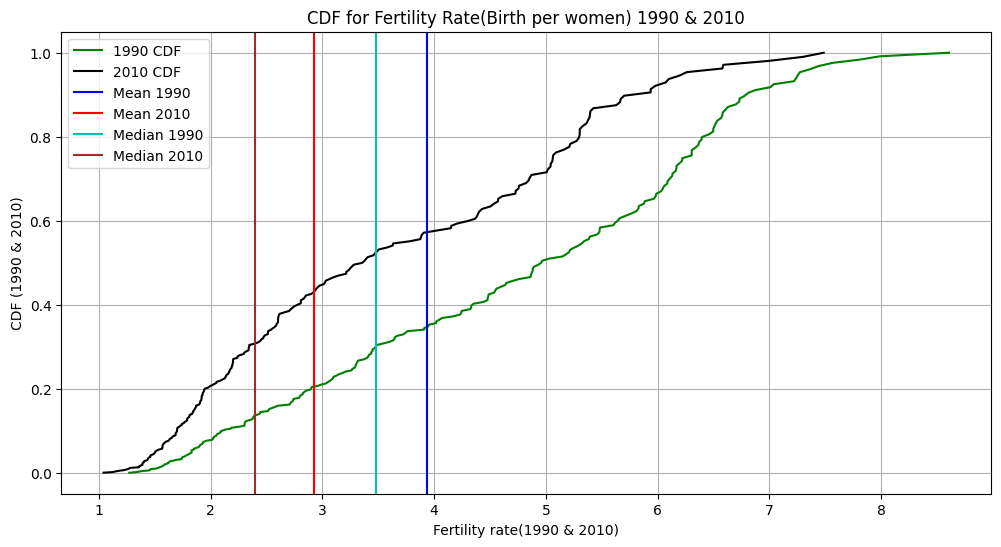

In [21]:
"""From the previous question continue to use the same dataframe
   of Fertility rate total(birth woman))"""
fertility_df_1990 = Fertility_df['1990']          # Extracting the column of 1990 from dataframe
fertility_df_2010 = Fertility_df['2010']          # Extracting the column of 2010 from fertility rate dataframe
# Removing Rows with NaN as value
Fertility_df_1990 = fertility_df_1990.dropna().values
Fertility_df_2010 = fertility_df_2010.dropna().values
Sum_1990 = np.sum(Fertility_df_1990)
Sum_2010 = np.sum(Fertility_df_2010)
#Cumulative Distribution Function (CDF)
Fertility_cdf_1990 = np.cumsum(np.sort(Fertility_df_1990)) /Sum_1990
Fertility_cdf_2010 = np.cumsum(np.sort(Fertility_df_2010)) /Sum_2010
# determining the mean and median for both column 1990 and 2010
Mean_Fertility_1990 = np.mean(Fertility_df_1990)
Mean_Fertility_2010 = np.mean(Fertility_df_2010)
Median_Fertility_1990 = np.median(Fertility_df_1990)
Median_Fertility_2010 = np.median(Fertility_df_2010)
# Plotting Cumulative Distribution Function(CDF) with vertical lines of Mean and Median
plt.figure(figsize = (12,6))
plt.plot(np.sort(Fertility_df_1990), Fertility_cdf_1990, color = 'g',label = '1990 CDF')
plt.plot(np.sort(Fertility_df_2010), Fertility_cdf_2010, color = 'k' ,label= '2010 CDF')
plt.axvline(Mean_Fertility_1990, color = 'b', label = 'Mean 1990')
plt.axvline(Mean_Fertility_2010, color = 'r', label = 'Mean 2010')
plt.axvline(Median_Fertility_1990, color = 'c', label = 'Median 1990')
plt.axvline(Median_Fertility_2010, color = 'brown', label = 'Median 2010')
plt.xlabel('Fertility rate(1990 & 2010)')
plt.ylabel('CDF (1990 & 2010)')
plt.legend()
plt.grid()
plt.title('CDF for Fertility Rate(Birth per women) 1990 & 2010')
plt.show()

QUESTION 5

C:\Users\Ange\AppData\Roaming\Python\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


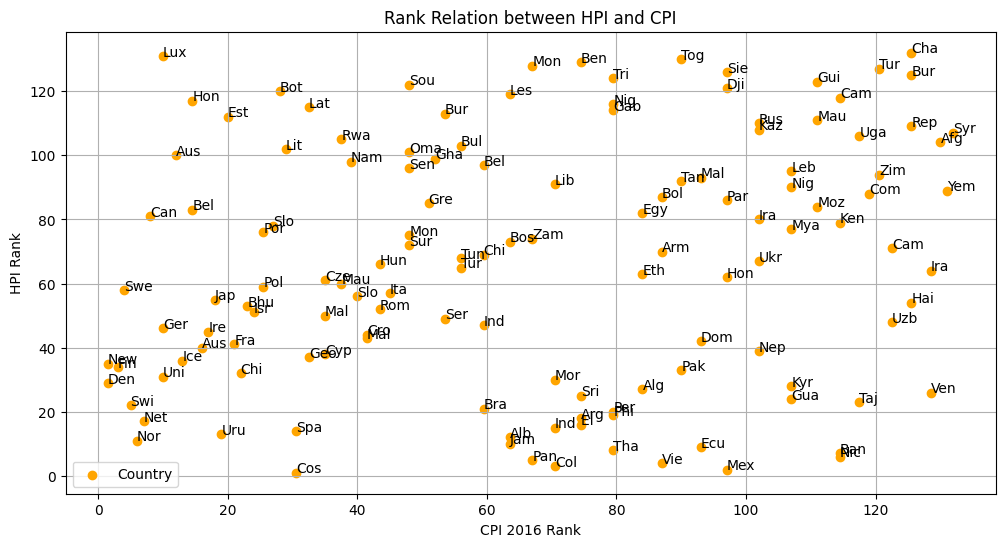

In [12]:
'''Using Data set for Happy planet index(HPI) and Corruption Percepection Index(CPI),
    codes that identify the matching country and plot the relation of country based dataset ranks'''
hpi_df = pd.read_excel('hpi-data-2016.xlsx', sheet_name = 'Complete HPI data', skiprows = 5)
corruption_df = pd.read_excel('CPI2016_Results.xlsx', sheet_name = 'CPI 2015-2016')
Hpi_df = hpi_df[['Country', 'HPI Rank']]
Corruption_df = corruption_df[['Country', 'CPI 2016 Rank']]
# Merging the two datasheet column 
hpi_corruption_df = pd.merge(Hpi_df, Corruption_df, on = 'Country', how = 'inner' )
# Ranking the Countries based on the CPI and HPI Rank
hpi_corruption_df['HPI Rank'] = hpi_corruption_df['HPI Rank'].rank()
hpi_corruption_df['CPI 2016 Rank'] = hpi_corruption_df['CPI 2016 Rank'].rank()
# Scatter plot the relation between HPI data and CPI data and rank the countries
plt.figure(figsize = (12,6))
plt.scatter(hpi_corruption_df['CPI 2016 Rank'], hpi_corruption_df['HPI Rank'], color = 'orange', label = 'Country')
# Annotating the scatter graph 
for i, row in hpi_corruption_df.iterrows():
    plt.annotate(row['Country'][:3], (row['CPI 2016 Rank'], row['HPI Rank']))
plt.xlabel('CPI 2016 Rank')
plt.ylabel("HPI Rank")
plt.legend()
plt.grid()
plt.title("Rank Relation between HPI and CPI")
plt.show()